In [375]:
from scipy.stats import bernoulli
from scipy.stats import beta
from scipy.stats import uniform 
import math

In [376]:
class Arm:
    
    def __init__(self, q):
        self.quality     = q
        self.num_pulled  = 0
        self.num_rewards = 0
    
    def pullthisarm(self):
        reward = bernoulli.rvs(size=1,p=self.quality)[0]
        self.num_pulled +=1
        self.num_rewards += reward
        return reward

class Envi:
    
    def __init__(self):
        self.arms = []
        
        self.best_arm = None
        self.cumul_regret = 0
        self.cumul_regret_at_round = []
        
        self.best_arm_unseen = None
        self.cumul_regret_unseen = 0
        self.cumul_regret_at_round_unseen = []
    
    def addArm(self, newArm):
        self.arms.append(newArm)
    
    def getQual(self, arm):
        return arm.quality
    
    def getBestArm(self):
        return self.best_arm
    
    def getNewArm(self):
        qual = uniform.rvs(size=1)[0]
        retArm = Arm(qual)
        return retArm
    
    #hyphothetical get new arm remains
    
    def pullNewArm(self):
        #qual = uniform.rvs(size=1)[0]
        #newArm = Arm(qual)
        newArm = self.getNewArm()
        self.addArm(newArm)
        self.best_arm = max(self.arms, key=self.getQual)
        self.best_arm_unseen = self.best_arm
        self.pull(newArm)
    
    def pull(self, arm):
        reward = arm.pullthisarm()
        self.cumul_regret += (self.best_arm.quality - arm.quality)
        self.cumul_regret_at_round.append(self.cumul_regret)
        
        self.best_arm_unseen = max(self.best_arm, self.getNewArm(), key=self.getQual)
        self.cumul_regret_unseen += (self.best_arm_unseen.quality - arm.quality)
        self.cumul_regret_at_round_unseen.append(self.cumul_regret_unseen)
        return reward

In [377]:
## Testing, remove this later
e = Envi()

for i in range(10):
    e.pullNewArm()

for i in e.arms:
    print(i.quality)

print("best is", e.getBestArm().quality)

for i in range(100):
    e.pull(e.arms[0])
    
print("cumul regret", e.cumul_regret)
print("num pulls", list(map(lambda x: x.num_pulled, e.arms)))
print("num rewards", list(map(lambda x: x.num_rewards, e.arms)))
print("count cumul_regret_at_round", len(e.cumul_regret_at_round))

0.8757274201738318
0.3763077707975653
0.2364828647477083
0.10261385324237582
0.10940043840564084
0.37935345079962013
0.20841365303581427
0.8974238463404084
0.31169912056477433
0.7296632771748713
best is 0.8974238463404084
cumul regret 6.7649204016130575
num pulls [101, 1, 1, 1, 1, 1, 1, 1, 1, 1]
num rewards [87, 1, 0, 0, 0, 0, 0, 1, 0, 1]
count cumul_regret_at_round 110


# Testing

In [378]:
DEFAULT_TEST_ROUNDS = 1000

def quickTest(envr, agent, rounds=DEFAULT_TEST_ROUNDS):
    e = Envi()
    #rounds = 1000
    ranAg = agent(e, rounds)
    ranAg.playFull()

    print("cumul regret", e.cumul_regret)
    #print("num pulls", list(map(lambda x: x.num_pulled, e.arms)))
    #print("num rewards", list(map(lambda x: x.num_rewards, e.arms)))
    #print("cumul_regret_at_round", e.cumul_regret_at_round)
    print("count cumul_regret_at_round", len(e.cumul_regret_at_round))
    
    print("unseen regret", e.cumul_regret_unseen)
    #print("tot pulls", sum(list(map(lambda x: x.num_pulled, e.arms))))
    #print("num pulls", list(map(lambda x: x.num_pulled, e.arms)))
    #print("num rewards", list(map(lambda x: x.num_rewards, e.arms)))
    #print("cumul_regret_at_round", e.cumul_regret_at_round)
    print("count cumul_regret_at_round", len(e.cumul_regret_at_round_unseen))
    
    import matplotlib.pyplot as plt
    time_hor = range(rounds)
    plt.plot(time_hor, e.cumul_regret_at_round)
    plt.plot(time_hor, e.cumul_regret_at_round_unseen)

# Agents

In [379]:
# Agent abstract class
class Agent:
    #pulls random arm with p = 0.5 or explores new arm with p = 0.5
    def __init__(self, envr, rounds):
        self.envr = envr
        self.total_rounds = rounds
        self.round = 0
        self.arm_pulled = []
        self.rewards = []
        self.total_reward = 0
        
    def playFull(self):
        for i in range(self.total_rounds):
            self.playRound()


## Random Agent

In [380]:
class RandomAgent(Agent):
    
    def playRound(self):
        self.round += 1
        available_arms = self.envr.arms
        #print(available_arms)
        ran = uniform.rvs(size=1)[0]
        if len(self.envr.arms) == 0 or ran > 0.5:
            self.envr.pullNewArm()
        else:
            ran2 = uniform.rvs(size=1)[0]
            index = int(ran2*(len(self.envr.arms)))
            #print("index", index)
            self.envr.pull(self.envr.arms[index])

cumul regret 461.9476566269941
count cumul_regret_at_round 1000
unseen regret 462.7524768936668
count cumul_regret_at_round 1000


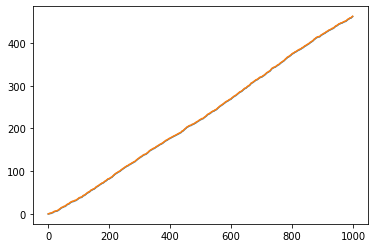

In [381]:
'''
e = Envi()
rounds = 1000
ranAg = RandomAgent(e, rounds)
ranAg.playFull()

print("cumul regret", e.cumul_regret)
print("tot pulls", sum(list(map(lambda x: x.num_pulled, e.arms))))
#print("num pulls", list(map(lambda x: x.num_pulled, e.arms)))
#print("num rewards", list(map(lambda x: x.num_rewards, e.arms)))
#print("cumul_regret_at_round", e.cumul_regret_at_round)
print("count cumul_regret_at_round", len(e.cumul_regret_at_round))

import matplotlib.pyplot as plt
time_hor = range(rounds)
plt.plot(time_hor, e.cumul_regret_at_round)
'''
quickTest(1, RandomAgent)

## Always-New Agent

In [382]:
class AlwaysNewAgent(Agent):
    
    def playRound(self):
        self.round += 1
        self.envr.pullNewArm()

cumul regret 483.3153946853772
count cumul_regret_at_round 1000
unseen regret 484.3408211321864
count cumul_regret_at_round 1000


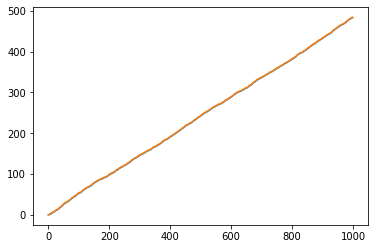

In [383]:
quickTest(1, AlwaysNewAgent)

## UCB Agent

In [384]:
class NaiveUCBAgent(Agent):
    def __init__(self, envr, rounds):
        Agent.__init__(self, envr, rounds)
        upper_conf_bound = []
    
    def playRound(self):
        self.round += 1
        available_arms = self.envr.arms
        
        if len(self.envr.arms) == 0 or uniform.rvs(size=1)[0] > 0.999:
            self.envr.pullNewArm()
        else:
            upper_conf_bound = [None] * len(available_arms)
            for i in range(len(available_arms)):
                s_i = available_arms[i].num_rewards
                n_i = available_arms[i].num_pulled
                a = (s_i/(n_i))
                b = (8 * math.log10(self.total_rounds+1))/(n_i)
                r = (a + math.sqrt(b))

                upper_conf_bound[i]=(r)
            
            max_smpl = max(upper_conf_bound)
            max_i = upper_conf_bound.index(max_smpl)
            self.envr.pull(self.envr.arms[max_i])

cumul regret 258.4714096626967
count cumul_regret_at_round 10000
unseen regret 669.8390719969543
num pulls [2166, 862, 50, 772, 270, 5537, 58, 86, 129, 70]
count cumul_regret_at_round 10000


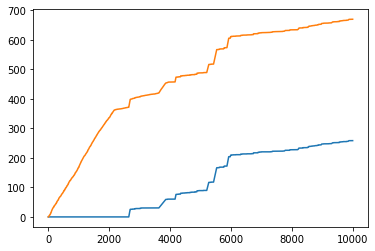

In [385]:
#quickTest(1, NaiveUCBAgent, rounds=10000)
e = Envi()
rounds = 10000
ranAg = NaiveUCBAgent(e, rounds)
ranAg.playFull()

print("cumul regret", e.cumul_regret)
#print("num pulls", list(map(lambda x: x.num_pulled, e.arms)))
#print("num rewards", list(map(lambda x: x.num_rewards, e.arms)))
#print("cumul_regret_at_round", e.cumul_regret_at_round)
print("count cumul_regret_at_round", len(e.cumul_regret_at_round))

print("unseen regret", e.cumul_regret_unseen)
#print("tot pulls", sum(list(map(lambda x: x.num_pulled, e.arms))))
print("num pulls", list(map(lambda x: x.num_pulled, e.arms)))
#print("num rewards", list(map(lambda x: x.num_rewards, e.arms)))
#print("cumul_regret_at_round", e.cumul_regret_at_round)
print("count cumul_regret_at_round", len(e.cumul_regret_at_round_unseen))

import matplotlib.pyplot as plt
time_hor = range(rounds)
plt.plot(time_hor, e.cumul_regret_at_round)
plt.plot(time_hor, e.cumul_regret_at_round_unseen)

## Naive Thompson Sampling Agent

In [400]:
class NaiveTSAgent(Agent):
    def __init__(self, envr, rounds):
        Agent.__init__(self, envr, rounds)
        upper_conf_bound = []
    
    def playRound(self):
        self.round += 1
        available_arms = self.envr.arms
        
        if len(self.envr.arms) == 0 or uniform.rvs(size=1)[0] > 0.99:
            self.envr.pullNewArm()
        else:
            thm_smpl = [None] * len(available_arms)
            for i in range(len(available_arms)):
                s_i = available_arms[i].num_rewards
                n_i = available_arms[i].num_pulled
                a = s_i + 1
                b = n_i - s_i + 1
                
                #print("a,b", a, b)
                r = beta.rvs(a, b, size=1)
                thm_smpl[i]=r[0]
                
                #upper_conf_bound[i]=(r)
            
            max_smpl = max(thm_smpl)
            max_i = thm_smpl.index(max_smpl)
            self.envr.pull(self.envr.arms[max_i])

cumul regret 176.50455796486415
count cumul_regret_at_round 10000
unseen regret 177.06182762603675
num pulls [3189, 3, 2, 2, 2, 1, 1, 6, 9, 2, 1912, 7, 2, 2, 1, 4, 76, 3, 2, 1, 3, 4, 2, 2, 1, 5, 9, 2, 6, 1, 2, 1, 19, 1, 4, 3, 2, 1, 1, 3960, 7, 1, 3, 4, 3, 2, 3, 3, 1, 2, 6, 3, 3, 6, 2, 12, 4, 3, 2, 1, 1, 1, 34, 1, 35, 6, 2, 1, 1, 7, 2, 1, 24, 1, 1, 24, 3, 3, 1, 4, 3, 1, 5, 3, 2, 1, 5, 1, 1, 1, 464, 2, 1, 2, 1, 4, 1, 1, 2, 2, 1, 2, 2, 2, 4, 3, 1, 2]
count cumul_regret_at_round 10000


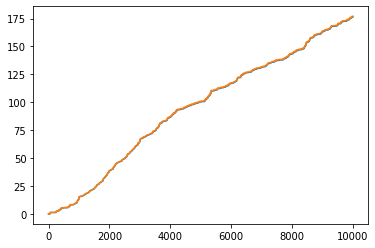

In [406]:
e = Envi()
rounds = 10000
ranAg = NaiveTSAgent(e, rounds)
ranAg.playFull()

print("cumul regret", e.cumul_regret)
#print("num pulls", list(map(lambda x: x.num_pulled, e.arms)))
#print("num rewards", list(map(lambda x: x.num_rewards, e.arms)))
#print("cumul_regret_at_round", e.cumul_regret_at_round)
print("count cumul_regret_at_round", len(e.cumul_regret_at_round))

print("unseen regret", e.cumul_regret_unseen)
#print("tot pulls", sum(list(map(lambda x: x.num_pulled, e.arms))))
print("num pulls", list(map(lambda x: x.num_pulled, e.arms)))
#print("num rewards", list(map(lambda x: x.num_rewards, e.arms)))
#print("cumul_regret_at_round", e.cumul_regret_at_round)
print("count cumul_regret_at_round", len(e.cumul_regret_at_round_unseen))

import matplotlib.pyplot as plt
time_hor = range(rounds)
plt.plot(time_hor, e.cumul_regret_at_round)
plt.plot(time_hor, e.cumul_regret_at_round_unseen)
plt.show()

## Fair UCB

In [412]:
class FairUCBAgent(Agent):
    def __init__(self, envr, rounds):
        Agent.__init__(self, envr, rounds)
        upper_conf_bound = []
    
    def playRound(self):
        self.round += 1
        available_arms = self.envr.arms
        
        if len(self.envr.arms) == 0:
            self.envr.pullNewArm()
        
        k = len(self.envr.arms)
        r = 0.1*(1/k)
        fairness_alpha = 0.1
        
        fair_pull_set = []
        for i in available_arms:
            fair_count = math.floor(r * self.total_rounds) - i.num_pulled
            if fair_count > fairness_alpha:
                fair_pull_set.append((i, fair_count))
        
        if fair_pull_set:
            max_smpl = max(fair_pull_set, key=lambda x: x[1])
            # max_smpl = max(list(map(lambda x: x[1], fair_pull_set)))
            # max_i = upper_conf_bound.index(max_smpl)
        
        
        if uniform.rvs(size=1)[0] > 0.999:
            self.envr.pullNewArm()
        else:
            upper_conf_bound = [None] * len(available_arms)
            for i in range(len(available_arms)):
                s_i = available_arms[i].num_rewards
                n_i = available_arms[i].num_pulled
                a = (s_i/(n_i))
                b = (8 * math.log10(self.total_rounds+1))/(n_i)
                r = (a + math.sqrt(b))

                upper_conf_bound[i]=(r)
            
            max_smpl = max(upper_conf_bound)
            max_i = upper_conf_bound.index(max_smpl)
            self.envr.pull(self.envr.arms[max_i])

In [409]:
quickTest(1, FairUCBAgent, rounds=1000)

UnboundLocalError: local variable 'upper_conf_bound' referenced before assignment